In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df_full = pd.read_csv("datasets_2013_3857_kag_risk_factors_cervical_cancer.csv")

In [4]:
df_fullna = df_full.replace('?', np.nan)

In [5]:
df = df_fullna  #making temporary save

In [6]:
df = df.apply(pd.to_numeric) #turn data into numeric type for computation

In [7]:
# for continuous variable
df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].median())
df['First sexual intercourse'] = df['First sexual intercourse'].fillna(df['First sexual intercourse'].median())
df['Num of pregnancies'] = df['Num of pregnancies'].fillna(df['Num of pregnancies'].median())
df['Smokes'] = df['Smokes'].fillna(1)
df['Smokes (years)'] = df['Smokes (years)'].fillna(df['Smokes (years)'].median())
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median())
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].fillna(1)
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median())
df['IUD'] = df['IUD'].fillna(0) # Under suggestion
df['IUD (years)'] = df['IUD (years)'].fillna(0) #Under suggestion
df['STDs'] = df['STDs'].fillna(1)
df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].median())
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].median())
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].median())
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].median())
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].median())
df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].median())
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].median())
df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].median())
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].median())
df['STDs:AIDS'] = df['STDs:AIDS'].fillna(df['STDs:AIDS'].median())
df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].median())
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].median())
df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].median())
df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].fillna(df['STDs: Time since first diagnosis'].median())
df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].fillna(df['STDs: Time since last diagnosis'].median())

In [8]:
# for categorical variable
df = pd.get_dummies(data=df, columns=['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

In [9]:
df_data = df #making temporary save

# Using Kmapper

## except Schiller_1, Hinselmann_1, cytology_1
because It seems that 'Schiller_1', 'Hinselmann_1' and 'cytology_1' had the highest correlation with biopsy(+)

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (858, 44)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler()

Mapping on data shaped (858, 44) using lens shaped (858, 2)

Minimal points in hypercube before clustering: 4
Creating 225 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

Cube_2 is empty.

Cube_3 is empty.

Cube_4 is empty.

Cube_5 is empty.

Cube_6 is empty.

Cube_7 is empty.

Cube_8 is empty.

Cube_9 is empty.

Cube_10 is empty.

Cube_11 is empty.

Cube_12 is empty.

Cube_13 is empty.

Cube_14 is empty.

Cube_15 is empty.

Cube_16 is empty.

Cube_17 is empty.

Cube_18 is empty.

Cube_19 is empty.

Cube_20 is empty.

Cube_21 is empty.

Cube_22 is empty.

   > Found 4 clusters.

Cube_24 is empty.

Cube_25 is empty.

Cube_26 is empty.

   > Found 4 clusters.

   > Found 4 clusters.

   > Found 4 clusters.

   > Found 4 clusters.

   > Found 4 clusters.

C

Wrote visualization to: CERVICAL-CANCER-output1.html


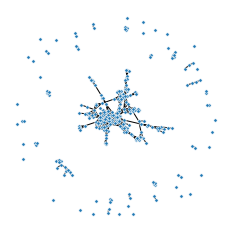

In [10]:
import sys
try:
    import pandas as pd
except ImportError as e:
    print("pandas is required for this example. Please install with `pip install pandas` and then try again.")
    sys.exit()

import numpy as np
import kmapper as km
import sklearn
from sklearn import ensemble


feature_names = [c for c in df.columns if c not in ['Schiller_1', 'Hinselmann_1', 'Citology_1']]
X = np.array(df[feature_names])  # quick and dirty imputation
y = np.array(df["Biopsy"])

# We create a custom 1-D lens with Isolation Forest
model = ensemble.IsolationForest(random_state=1729)
model.fit(X)
lens1 = model.decision_function(X).reshape((X.shape[0], 1))

# We create another 1-D lens with L2-norm
mapper = km.KeplerMapper(verbose=3)
lens2 = mapper.fit_transform(X, projection="l2norm")

# Combine both lenses to create a 2-D [Isolation Forest, L^2-Norm] lens
lens = np.c_[lens1, lens2]

# Create the simplicial complex
graph = mapper.map(lens,
                   X,
                   cover=km.Cover(n_cubes=15, perc_overlap=0.3),
                   clusterer=sklearn.cluster.KMeans(n_clusters=4,
                                                    random_state=9999))

# Visualization
from kmapper import jupyter
html = mapper.visualize(graph, path_html="CERVICAL-CANCER-output1.html")
jupyter.display(path_html="CERVICAL-CANCER-output1.html")





import matplotlib.pyplot as plt
km.draw_matplotlib(graph)
plt.show()

## Schiller_1, Hinselmann_1, cytology_1 기준(생검과 가장 연관이 깊은 feature들만 모아서)

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (858, 3)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler()

Mapping on data shaped (858, 3) using lens shaped (858, 2)

Minimal points in hypercube before clustering: 3
Creating 225 hypercubes.
   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 2 clusters.

   > Found 2 clusters.

   > Found 1 clusters.


Created 30 edges and 22 nodes in 0:00:00.428853.
Wrote visualization to: CERVICAL-CANCER-output4.html


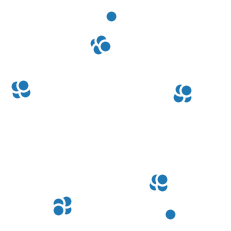

In [16]:
import sys
try:
    import pandas as pd
except ImportError as e:
    print("pandas is required for this example. Please install with `pip install pandas` and then try again.")
    sys.exit()

import numpy as np
import kmapper as km
import sklearn
from sklearn import ensemble


feature_names = [c for c in df.columns if c in ['Schiller_1', 'Hinselmann_1', 'Citology_1']]
X = np.array(df[feature_names])  # quick and dirty imputation
y = np.array(df["Biopsy"])

# We create a custom 1-D lens with Isolation Forest
model = ensemble.IsolationForest(random_state=1729)
model.fit(X)
lens1 = model.decision_function(X).reshape((X.shape[0], 1))

# We create another 1-D lens with L2-norm
mapper = km.KeplerMapper(verbose=3)
lens2 = mapper.fit_transform(X, projection="l2norm")

# Combine both lenses to create a 2-D [Isolation Forest, L^2-Norm] lens
lens = np.c_[lens1, lens2]

# Create the simplicial complex
graph = mapper.map(lens,
                   X,
                   cover=km.Cover(n_cubes=15, perc_overlap=0.5),
                   clusterer=sklearn.cluster.KMeans(n_clusters=3,
                                                    random_state=9999))

# Visualization
from kmapper import jupyter
html = mapper.visualize(graph, path_html="CERVICAL-CANCER-output4.html")
jupyter.display(path_html="CERVICAL-CANCER-output4.html")





import matplotlib.pyplot as plt
km.draw_matplotlib(graph)
plt.show()

## HPV(인간 유두종 바이러스), First sexual intercourse(첫 성관계 나이),  Number of sexual partners(성적 파트너 수) 기준
높은 성 활동으로 인한 인간 유두종 바이러스(HPV)는 자궁경부암의 주요 위험 요인이다. 성인의 경우 HPV의 가장 중요한 위험요인은 감염된 사람과의 성행위다. 자궁경부암의 위험이 가장 높은 여성은 복수의 성관계, 17세 이하 성관계 이력이 있거나 둘 다 있는 여성이다.


### perc_overlap : 0.3

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (858, 3)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler()

Mapping on data shaped (858, 3) using lens shaped (858, 2)

Minimal points in hypercube before clustering: 4
Creating 225 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

Cube_2 is empty.

Cube_3 is empty.

Cube_4 is empty.

Cube_5 is empty.

Cube_6 is empty.

Cube_7 is empty.

Cube_8 is empty.

Cube_9 is empty.

Cube_10 is empty.

Cube_11 is empty.

Cube_12 is empty.

Cube_13 is empty.

Cube_14 is empty.

Cube_15 is empty.

Cube_16 is empty.

Cube_17 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

Cube_20 is empty.

Cube_21 is empty.

Cube_22 is empty.

Cube_23 is empty.

Cube_24 is empty.

Cube_25 is empty.

Cube_26 is empty.

Cube_27 is empty.

Cube_28 is empty.

   > Found 4 clusters.

Cube_30 is empty.

Cube_31 is empty.

Cube_32 is empty.


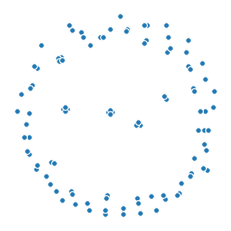

In [12]:
import sys
try:
    import pandas as pd
except ImportError as e:
    print("pandas is required for this example. Please install with `pip install pandas` and then try again.")
    sys.exit()

import numpy as np
import kmapper as km
import sklearn
from sklearn import ensemble


feature_names = [c for c in df.columns if c in ['STDs:HPV', 'First sexual intercourse', 'Number of sexual partners']]
X = np.array(df[feature_names])  # quick and dirty imputation
y = np.array(df["Biopsy"])

# We create a custom 1-D lens with Isolation Forest
model = ensemble.IsolationForest(random_state=1729)
model.fit(X)
lens1 = model.decision_function(X).reshape((X.shape[0], 1))

# We create another 1-D lens with L2-norm
mapper = km.KeplerMapper(verbose=3)
lens2 = mapper.fit_transform(X, projection="l2norm")

# Combine both lenses to create a 2-D [Isolation Forest, L^2-Norm] lens
lens = np.c_[lens1, lens2]

# Create the simplicial complex
graph = mapper.map(lens,
                   X,
                   cover=km.Cover(n_cubes=15, perc_overlap=0.3),
                   clusterer=sklearn.cluster.KMeans(n_clusters=4,
                                                    random_state=9999))

# Visualization
from kmapper import jupyter
html = mapper.visualize(graph, path_html="CERVICAL-CANCER-output2.html")
jupyter.display(path_html="CERVICAL-CANCER-output2.html")





import matplotlib.pyplot as plt
km.draw_matplotlib(graph)
plt.show()

### perc_overlap : 0.5

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (858, 3)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler()

Mapping on data shaped (858, 3) using lens shaped (858, 2)

Minimal points in hypercube before clustering: 4
Creating 225 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

Cube_2 is empty.

Cube_3 is empty.

Cube_4 is empty.

Cube_5 is empty.

Cube_6 is empty.

Cube_7 is empty.

Cube_8 is empty.

Cube_9 is empty.

Cube_10 is empty.

Cube_11 is empty.

Cube_12 is empty.

Cube_13 is empty.

Cube_14 is empty.

Cube_15 is empty.

Cube_16 is empty.

Cube_17 is empty.

Cube_18 is empty.

Cube_19 is empty.

   > Found 4 clusters.

   > Found 4 clusters.

Cube_22 is empty.

   > Found 4 clusters.

   > Found 4 clusters.

   > Found 3 clusters.

Cube_26 is empty.

Cube_27 is empty.

Cube_28 is empty.

   > Found 2 clusters.

   > Found 2 clusters.

Cube_31 is empty.

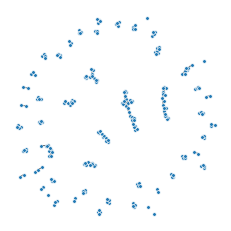

In [13]:
import sys
try:
    import pandas as pd
except ImportError as e:
    print("pandas is required for this example. Please install with `pip install pandas` and then try again.")
    sys.exit()

import numpy as np
import kmapper as km
import sklearn
from sklearn import ensemble


feature_names = [c for c in df.columns if c in ['STDs:HPV', 'First sexual intercourse', 'Number of sexual partners']]
X = np.array(df[feature_names])  # quick and dirty imputation
y = np.array(df["Biopsy"])

# We create a custom 1-D lens with Isolation Forest
model = ensemble.IsolationForest(random_state=1729)
model.fit(X)
lens1 = model.decision_function(X).reshape((X.shape[0], 1))

# We create another 1-D lens with L2-norm
mapper = km.KeplerMapper(verbose=3)
lens2 = mapper.fit_transform(X, projection="l2norm")

# Combine both lenses to create a 2-D [Isolation Forest, L^2-Norm] lens
lens = np.c_[lens1, lens2]

# Create the simplicial complex
graph = mapper.map(lens,
                   X,
                   cover=km.Cover(n_cubes=15, perc_overlap=0.5),
                   clusterer=sklearn.cluster.KMeans(n_clusters=4,
                                                    random_state=9999))

# Visualization
from kmapper import jupyter
html = mapper.visualize(graph, path_html="CERVICAL-CANCER-output3.html")
jupyter.display(path_html="CERVICAL-CANCER-output3.html")





import matplotlib.pyplot as plt
km.draw_matplotlib(graph)
plt.show()